# Exploratory Data Analysis: AMES House Prices Dataset
## Presented at the School of AI Irving, TX
#### Prepared by Rene M. Pineda

## Introduction
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is utilized for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In my opinion, EDA is sometimes neglected in the data science workflow, as implied in the following chart: 

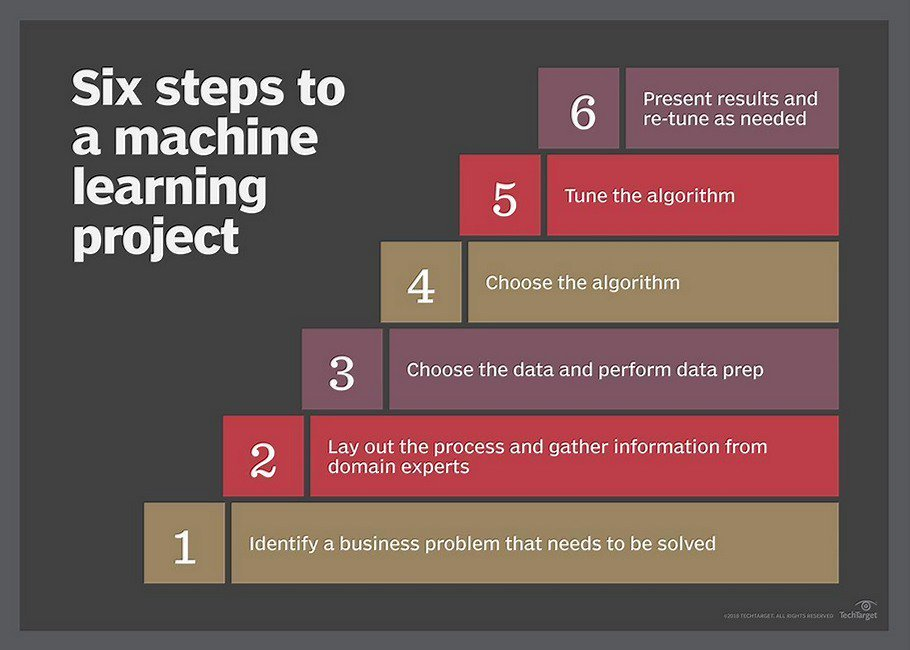
      
                
In my experience, taking your time to perform EDA and document your findings is extremely valuable: it will more often than not make a huge difference in the accuracy of your predictions. Some of the best Kaggle contributors produce amazing EDA Notebooks. 

# Contents:

* 1. Understand the problem and formulate hypotheses

* 2. Quick exploration of the data
   * 2.1 Explore the data set
   * 2.2 Explore the target variable
          * 2.2.1 Distribution plot
          * 2.2.2 Variable transformation
          * 2.2.3 Identifying outliers

* 3. Distribution plots
    * 3.1 Distribution of numeric variables
    * 3.2 Distribution of categorical variables
    * 3.3 Mixin-up numeric and categorical variables

* 4. Analyzing correlations
    * 4.1 Scatterplots
    * 4.2 The correlation matrix

* 5. Handling missing data
    * 5.1 Identifying missing values
    * 5.2 Imputation

* 6. Feature Engineering
    
* 7. Exercises

## Understand the problem and generate hypothesis

**Problem:** predict house prices based on house features.

It is usually very useful to familiarize yourself with the problem by doing some research, reading the data documentation, or talking to a SME. In this case, and although I've never bought a house, I've watched my fair share of 'Love it or List it', 'Property Brothers' and 'Caribbean Life'. Based on this, I will generate some hypotheses to have in mind during the EDA stage:
* House size, overall condition and location are the strongest predictors of the price of a house.
* The quality of the kitchen is a very valuable feature for many people
* There will be many correlated variables, for example: size of the house with garage size and number of bedrooms, kitchen quality and overall quality.
* The real estate market is subject to bubbles and crashes which might influence the price of the house independently of its features. 

In this case we are all familiar with the problem, and therefore we feel confindent when we approach the data. Train to gain the same confidence when approaching more complex data sets.

In [34]:
# Load the packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt

# Allow the charts to show directly into the notebook
%matplotlib inline

In [35]:
#Load the data
houses = pd.read_csv('data/train.csv')

## 1. Quick exploration of the data:
* Get a sense of the general look of the data
* Check the number of variables (columns) and sample size (rows)
* Get a first glance of whether NAs might be a problem
* Understand which variables are numerical and which ones categorical
* Understand the distribution of the variables

### 1.1 Explore the whole data set
Even a basic action such as listing the variables will reveal a lot of information.

In [4]:
# Use the info method to list all variables:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It's always useful to get a sense of how the data actually looks like:

In [5]:
# Read the table
houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Python makes it easy to summarize the numeric variables:

In [6]:
#Summary Statistics
houses.describe(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Explore the target variable
### 2.2.1 Distribution Plot

D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Price in US dollars')

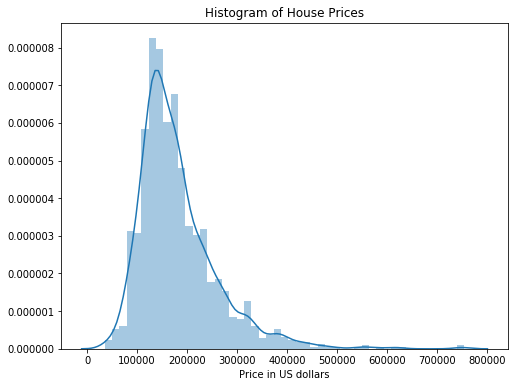

In [7]:
# Histogram of the response variable

#Create the "frame" for the chart
fig, axes = plt.subplots(figsize=(8,6))
#Use Seaborn to create the histogram and label your chart:
sns.distplot(houses['SalePrice'], kde = True, norm_hist=True)
axes.set_title('Histogram of House Prices')
axes.set_xlabel('Price in US dollars')

### Description of the distribution

* This distibution has several names: skewed to the left, long-tailed, 
* Explanation: there are only a few houses with very high prices
* This is common in distribution for variables such as income (think of salaries), loans, time of a customer service call.

### Optional discussion: When is it required to have a normal distribution for the response variable?
* Some predictive models and tools will make strong assumptions about the distribution of the response variable.
* For example, linear regression will assume that for each level of the features, the response variable will be sampled from a normal distribution
* Hypothesis testing for coefficients or differences in means will also make an assumption about normality
* Other models, however, have less restrictive assumptions. In that case we don't need to care about this distribution

I've seen a lot of confusion around this topic, and many people seem to be concerned about the normality of their data. IMO, this is caused by the extensive coverage that statistics courses give to hypothesis testing, confidence intervals and linear regression, where normality assumptions are critical (although the estimators are robust, which means that they will be unbiased with a sufficiently large data set, even if the data doesn't "look" normal!). The professor never informs us when to stop worrying about normality.
* Some people are concerned about the normality of the features, even though most features will never have a normal distribution! (think of neighborhood, garage space, kitchen quality, year remodeled, etc.)
* Example of the confusion caused by this topic: worrying about making data "look normal" for an XGBoost algorithm, when it doesn't make any assumptions about normality: https://preview.tinyurl.com/y8vhuvkz

Solution: know your algorithms. Learn which assumptions they make about your data, and prepare (pre-process) it accordingly. 

### 2.2.2 Variable Transformation
There is a couple of things we can try if we want the response variable to approximate a normal distribution. For example, we can apply a 'log transformation', which will reduce the skewness of the data, and make the linear relationship with features stronger. 

In [8]:
houses['LogSalePrice'] = np.log(houses['SalePrice'])

D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of House Prices')

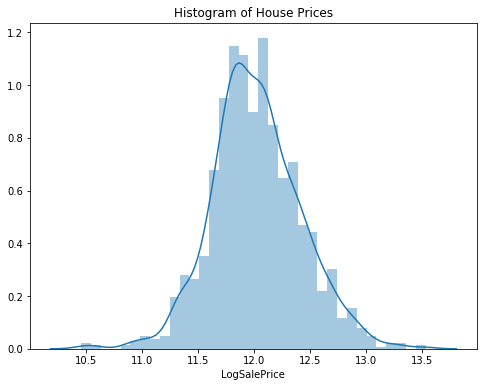

In [9]:
#Create the "frame" for the chart
fig, ax = plt.subplots(figsize=(8,6))
#Create the histogram for the transformed variable
sns.distplot(houses['LogSalePrice'], kde = True)
ax.set_title('Histogram of House Prices')

### 2.2.3 Identifying outliers

We generally define outliers as samples that are exceptionally far from the mainstream of data.There is no rigid mathematical definition of what constitutes an outlier; determining whether or not an observation is an outlier is ultimately a subjective exercise.

What is the problem of outliers? The presence of outliers is a violation of fundamental assumptions in some statistical models. They may produce biased estimators and increase the error variance, which will in turn affect the quality of your predictions and reduce the power of statistical tests. See the following illustrative example where the presence of one outlier greatly affects the estimated coefficient:

<img src = 'img/outlier.png'>

What causes outliers? Outliers can be un-natural or artificial, caused by measurement errors, data entry errors, bad experiment designs, etc. However, there could also be natural outliers that contain useful information about extreme values of the data.

How to detect outliers? Outliers can be detected by simple inspection of the data, using boxplots, histograms, etc. If we assume that the data has a given distribution, we can also detect outliers by transforming the data to fit the distribution and identify extreme values. See the examples below.

There are more rigurous mathematical methods to detect and handle outliers. If you're performing linear regression, you should analyze the Leverage and Cook's D values for the residuals, which will reveal if the outliers have an impact on your estimators. Other methods include proximity-based models (clustering), linear models that map the data to lower dimensional spaces (such as PCA), and specific methods to handle outliers in a multivariate context. 

Should outliers be removed from the data? I've seen many approaches to this. Some experienced data scientists will remove data points after simple visual inspection. Because of my background, I'm very hesitant to remove outliers, and will usually try to perform 2-3 tests before deciding. Take into account that they might contain valuable information about your data. Maybe it's better to keep the outliers and try other techniques such as binning or transforming the data. 


#### Univariate outliers
This refers to identifying outliers in the distribution of a single variable, for example the Sale Price. 

D:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


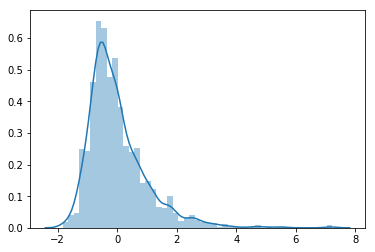

In [10]:
#Standardize the variable to a normal distribution, transforming to Z-scores
scaled_Prices = preprocessing.scale(houses['SalePrice'])

# Plot the data for visual inspection
sns.distplot(scaled_Prices)

In [11]:
# Identify those data points that are 3 or more standard deviations away from the mean
scaled_Prices[abs(scaled_Prices) > 3]

array([3.24696665, 4.04098249, 3.70305009, 3.226492  , 3.08604046,
       4.71041276, 3.26232893, 3.1364086 , 3.34116765, 3.41280373,
       3.04826436, 7.22881942, 4.49634819, 3.82897043, 5.06214602,
       5.42383959, 4.73032076, 3.07181146, 5.59185509, 7.10289909,
       3.57712976, 3.59601781])

### Multivariate outlier detection

In this case we're taking more than one variable into account to detect outliers. For example, we can try to detect outliers of the Sale Price taking into account the size of the house.

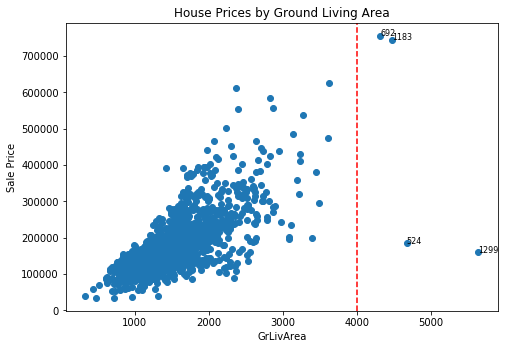

In [12]:
# Create a plot of Sale Price vs. Living Area
fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
x = houses['GrLivArea']
y = houses['SalePrice']
Id = houses['Id']
axes.scatter(x,y)
axes.axvline(x=4000, color = 'red', linestyle = '--' )
axes.set_xlabel('GrLivArea')
axes.set_ylabel('Sale Price')
axes.set_title('House Prices by Ground Living Area')

#Label the houses that are bigger than 4,000 sq. ft.:
for i, house in enumerate(Id):
    if x[i] > 4000:
        axes.annotate(house, (x[i],y[i]), fontsize = 8)


We center our attention on the four largest houses, two of which seem to be undervalued. Let's investigate if there's any reason their price is so low by listing some features on the houses with GrLivArea greater than 4,000 sq. ft.:

In [13]:
houses.iloc[[691,1182,523,1298],][['Id','GrLivArea','SalePrice','OverallQual','OverallCond','YearBuilt','GarageCars','PoolQC','SaleCondition']]

,Id,GrLivArea,SalePrice,OverallQual,OverallCond,YearBuilt,GarageCars,PoolQC,SaleCondition
691,692,4316,755000,10,6,1994,3,NaN,Normal
1182,1183,4476,745000,10,5,1996,3,Ex,Abnorml
523,524,4676,184750,10,5,2007,3,NaN,Partial
1298,1299,5642,160000,10,5,2008,2,Gd,Partial


It definitely looks like the houses were in good condition and fairly new, although the sale condition 'Partial' indicates that the home was not completed. We should keep them in mind for further investigation.

## 3. Distribution Plots
At the core of EDA is the plotting of the data using the visualization capabilities of Python (matplotlib and seaborn). Apart from the following examples, make sure you check out the nice Gallery at https://seaborn.pydata.org/examples/index.html

### 3.1 Distribution Plots for numeric data
The most widely utilized chart types are histograms (for 1 variable), scatterplots (for comparison of two variables), and bars (for aggregations). We use them all in this notebook. One excellent capability of Python is the ability to get quick plots of all the numeric variables with pair plots.

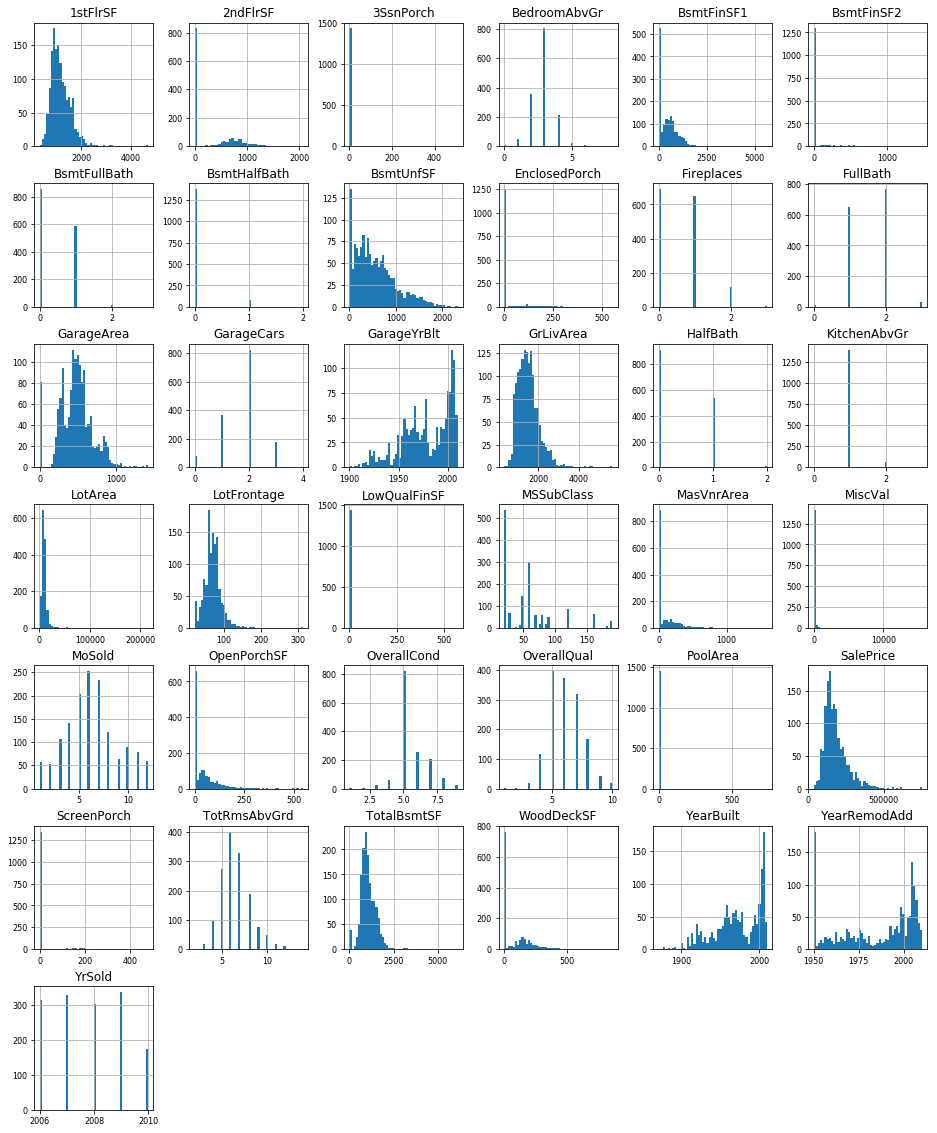

In [14]:
# Select only the numeric variables and put them into a data frame
df_numeric = houses.select_dtypes(include = ['float64', 'int64'])
#Drop the ID and LogSalePrice variables
df_numeric = df_numeric.drop(['Id', 'LogSalePrice'], axis = 1)

#Plotting histograms of each variable
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Question: Which of these features do you consider actual numeric features? Which could be better described as 'categorical'?

If you'd remember only one chart from this notebook, it should be the following one, because it's the most useful in my opinion:

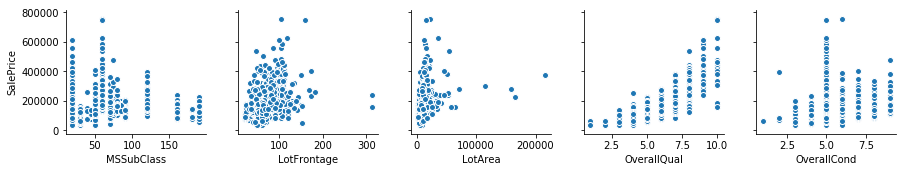

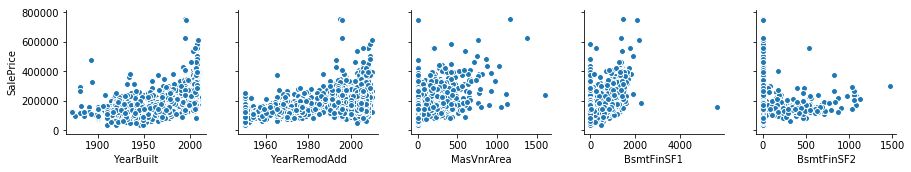

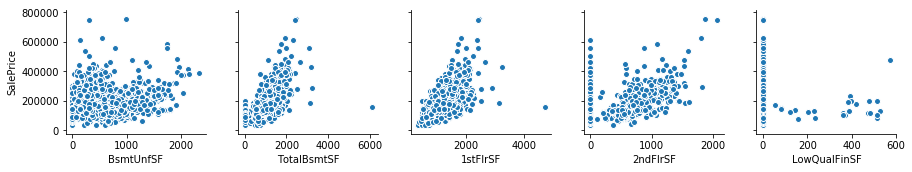

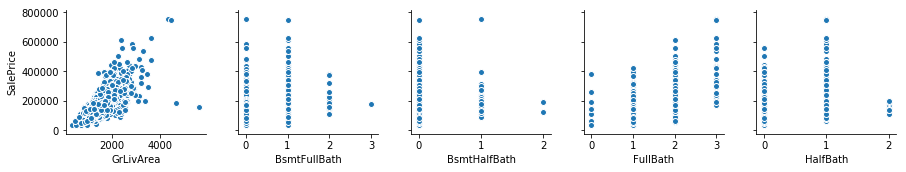

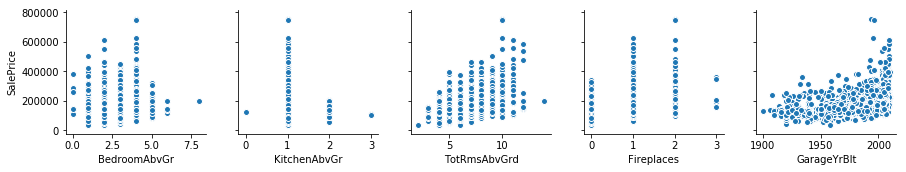

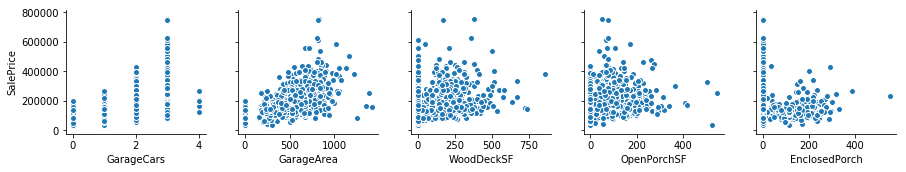

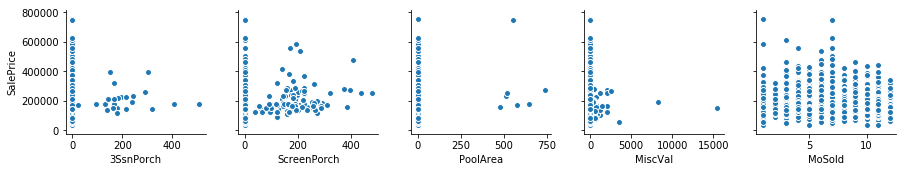

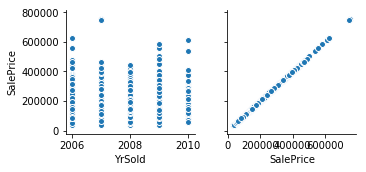

In [15]:
# Plotting the relationship of each numeric feature with Sales Price. 
for i in range(0, len(df_numeric.columns), 5):
    sns.pairplot(data=df_numeric,
                x_vars=df_numeric.columns[i:i+5],
                y_vars=['SalePrice'])

### 3.2 Distribution Plots for categorical data

Describe the distribution of House Prices by Neighborhood using a boxplot, also called a box-and-whisker plot

Text(0.5,1,'Distribution of House Prices by Neighborhood')

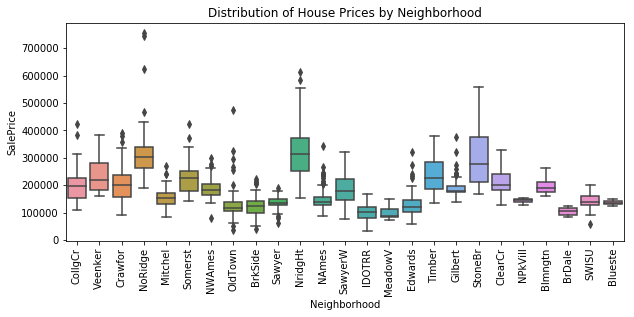

In [16]:
f, ax = plt.subplots(figsize=(10, 4))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=houses)
plt.xticks(rotation=90)
ax.set_title('Distribution of House Prices by Neighborhood')

We can see that the price distribution varies quite a bit from one neighborhood to the other, which means that Neighborhood is probably a good predictor. Features that have a lot of variability are usually good predictors.

We can try different types of plots and assess the advantages and disadvantages of each:

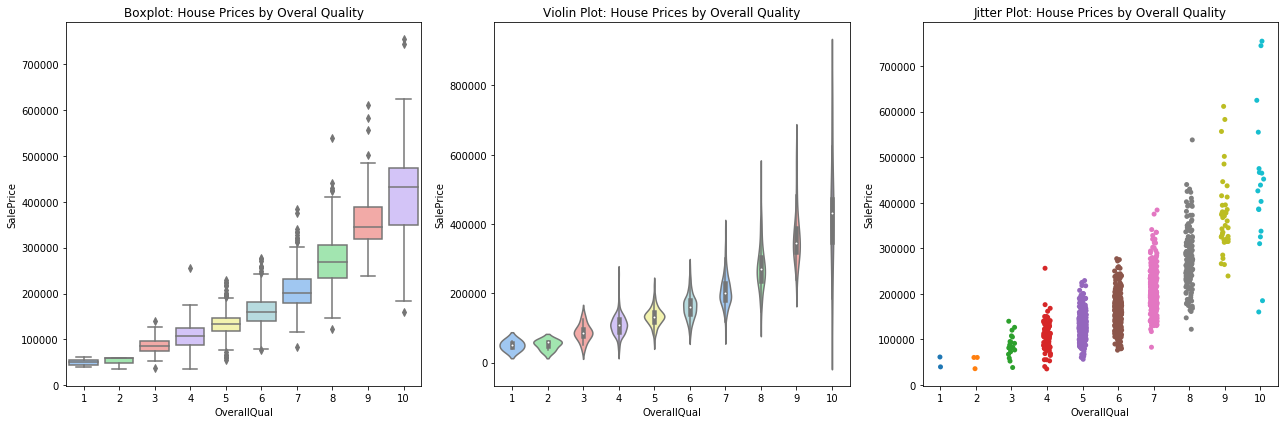

In [17]:
# Overall Quality of the house vs. Sale Price
# Set up the layout for the plots:
f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize=(18, 6))
# Create the box plot
sns.boxplot(x='OverallQual', y='SalePrice', data=houses, palette = 'pastel', ax=ax1)
ax1.set_title('Boxplot: House Prices by Overal Quality')

#Create the dot plot:
sns.violinplot(x='OverallQual', y='SalePrice', data=houses, palette = 'pastel', ax=ax2)
ax2.set_title('Violin Plot: House Prices by Overall Quality')

# A nicer jitter plot (or stripplot):
sns.stripplot(x='OverallQual', y='SalePrice', data=houses, ax=ax3, jitter = True) # We use jitter to bring out the distribution of the data
ax3.set_title('Jitter Plot: House Prices by Overall Quality')

f.tight_layout()

Inspecting the 'Kitchen Quality' Feature.

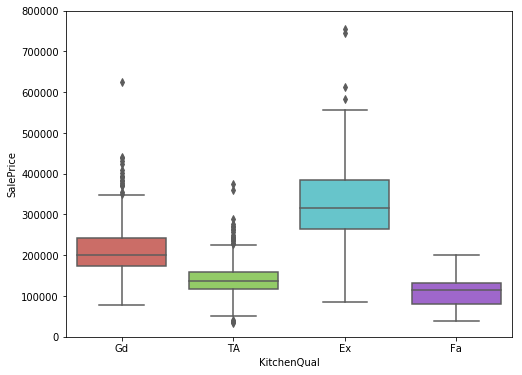

In [19]:
# Overall Quality of the kitchen vs. Sale Price

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=houses, palette='hls')
fig.axis(ymin=0, ymax=800000);

Keep in mind that Kitchen Quality might be correlated to other variables such as Overall Quality. We can use a bar plot to estimate the average quality of the house for each category of KitchenQual:

Text(0.5,1,'Average Overall Quality by level of Kitchen Quality')

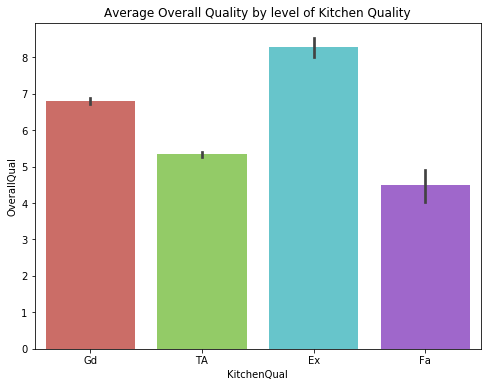

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='KitchenQual', y='OverallQual', data=houses, palette = 'hls') # The default aggregation is the mean value for each category
ax.set_title('Average Overall Quality by level of Kitchen Quality')

### 3.3 Mixing-up categorical and numerical features

Many datasets identify categorical data as numeric, simply because of how the data is entered into the database. Before we run a model, we have to make sure that this features are converted to categorical, in order to ensure that our model will consider them appropiately.

We have a clear example in our dataset: Year and month are identified as numeric, when they are categorical. Let's explore the variables.

#### Did the 2008 crisis have an impact on house prices and sales?
We can explore the time variables in several ways. First, observe if there is a downward trend in house prices:

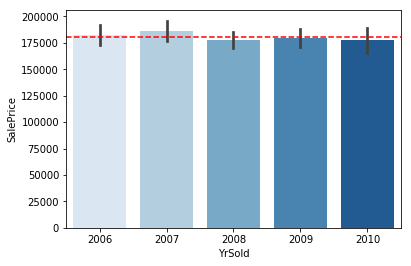

In [22]:
# Create a barplot wit the mean price of the houses for each year
sns.barplot(x='YrSold', y='SalePrice', data=houses, palette='Blues')

#Plot the mean overall price
plt.axhline(y=houses['SalePrice'].mean(), color = 'red', linestyle = '--' )

We can see a slight decrease in prices starting in 2008. If we had robust evidence that the crisis caused an impact on prices (for example by doing a multivariate ANOVA test), we could even consider creating a dummy variable 'Crisis', equal to 0 from 2006 to Nov 2008, and equal to 1 from Dec 2008 onwards. We could test afterwards if this variable helps the predictions to be more accurrate. This type of experimental mindset is helpful when performing EDA. 

#### Is there any seasonality? When do people buy houses? How do prices vary?

In [24]:
# Create a concatenated variable to have Yr and Month for each sale
month_year = pd.concat([houses['MoSold'], houses['YrSold']], axis=1)

#Before creating the heat map, we need to create two pivot tables with number of houses sold and average prices for each month
numbersold_heat_map = month_year.pivot_table(index = 'MoSold', columns='YrSold', aggfunc=np.count_nonzero)
price_heat_map = houses.pivot_table(index = 'MoSold', columns='YrSold', values='SalePrice', aggfunc=np.mean)

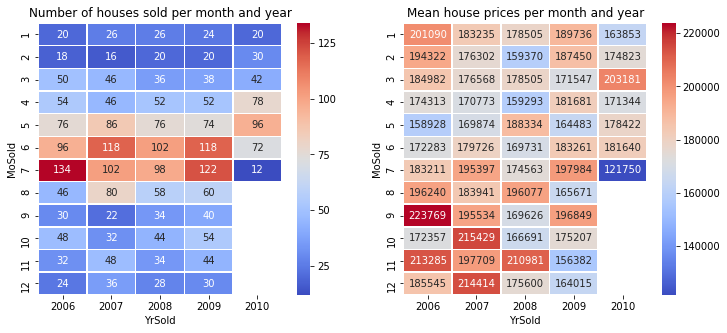

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (12,5))
ax1.set_title('Number of houses sold per month and year')
ax2.set_title('Mean house prices per month and year')
sns.heatmap(numbersold_heat_map, cmap='coolwarm', ax=ax1, annot=True, fmt = "g",annot_kws={"size":10}, linewidths=0.5)
sns.heatmap(price_heat_map, cmap = 'coolwarm', ax=ax2, annot=True, fmt='g', linewidths=0.5)


## 4. Analyzing correlations

This step is important because it adds a degree of mathematical formality to our analysis, which so far has been mostly intuitive. We're going to find the linear (Pearson) correlation between the numerical features and the Sale Price. 

#### Possible values for the linear correlation coefficient:

<img src="img/correlation.jpg" height = 345 width = 500>

### 4.1 Scatterplots

D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


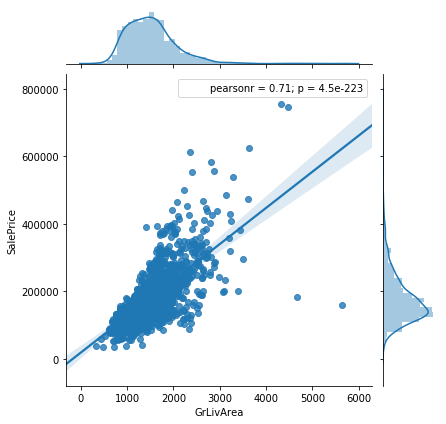

In [27]:
# We can analyze linear correlation using scatterplots
sns.jointplot(x='GrLivArea',y='SalePrice',data=houses,kind='reg')

### 4.2 Correlation Matrix
We will calculate the correlation matrix between the numerical variables in order to identify:
* The features that have the larges correlation with the Sales Price target value
* Possible correlation between features, which is something we'd have to take into account to ensure that our model works well

In [36]:
#How many numeric variables are there? 39 in total
houses.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [29]:
# calculate the correlation matrix
corr = round(houses.corr(),2) # the number 2 is only to round up the values to 2 decimals

#Sort the values from highest to lowest, and then select the top 10 variables
# order_corr = corr.reindex(corr.SalePrice.abs().sort_values().index)

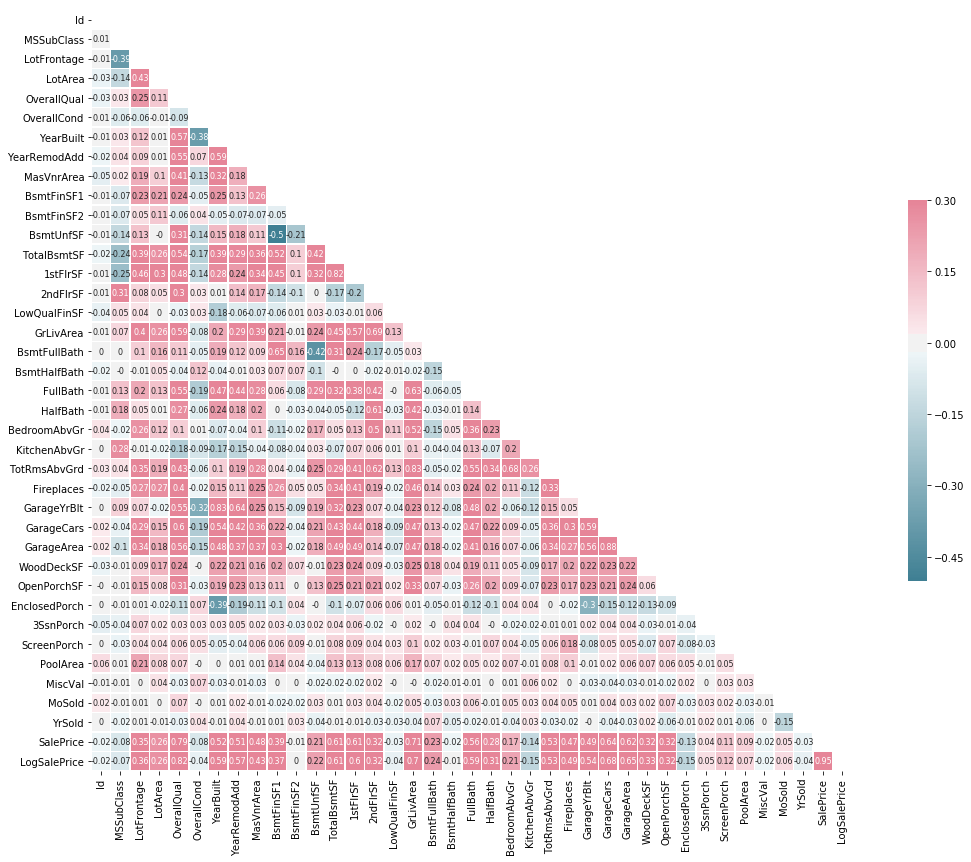

In [30]:
# We can use a heatmap type chart to have a better visualization:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

# Use a mask to cover the upper right part of the matrix (which contains duplicate values)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":8})

## 5. Handling Missing data:

### 5.1 Identify null values:
* Check which variables have null values, and determine the probable reasons for that
* Decide what to do with null values among several options:
    - Categorical imputation
    - Imputation based on the distribution of the data (mean, median, mode)
    - Delete instances
    - Try to predict what the null value data point should be, based on other features in the data set. 
* This is usually done on a case-by-case basis, and it usually requires examining the data in detail

#### List all variables that contain NAs

In [37]:
# List all the variables that have NA values:
NA = houses.isnull().sum().sort_values(ascending=False)
NA[NA > 0]

MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageType        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### 5.2 Imputation of data

#### Simple cases of imputation
The variable with the largest number of NAs is PoolQC. Check the content of the PoolQC variable: 

In [37]:
# The value_counts method is very useful for describing categorical variables: 
houses['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [32]:
#Assign 'No Pool' Category to NA's:
houses['PoolQC'].fillna('No Pool', inplace = True)
houses['PoolQC'].value_counts()

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [38]:
# Another variable with many NAs is Alley. The documentation says that there is no alley access to the property. 
houses['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [39]:
houses['Alley'].fillna('No Alley', inplace = True)
houses['Alley'].value_counts(dropna=False)

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

#### The Garage variables
There are 7 variables that have to do with Garage, and we can see that 5 of them have 81 NA values. We have to investigate what is happenning and fix them as a group.

In [40]:
# First, it makes sense to impute GarageYrBlt with the same year the house was built.
houses['GarageYrBlt'].fillna(houses['YearBuilt'], inplace = True)
houses['GarageYrBlt'].isnull().sum()

0

In [ ]:
For GarageQual, GarageCond, GarageType, and GarageFinish, we can do more detailed research to impute a sensible value. 
A sensible and commonly utilized approach is to fill the value with the most common occurrence. For example:

In [43]:
# Use value_counts to find the most common category
houses['GarageType'].value_counts(dropna = False)

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
houses['GarageType'].fillna('Attchd', inplace = True)
houses['GarageType'].value_counts(dropna = False)

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

## 6. Feature Engineering

Feature Engineering can be defined as **"Extracting more data from the data you already have"**. It's waaaay more an art than a science, and although there are advanced tools that automate this process (https://tinyurl.com/ybfctfav), it's better to experiment and gain more practice before using them.

Remember 3 characteristics of good features:

1. **Informative**: does the feature actually correlates with the target variable? Avoid useless features that may actually hurt your algorithm.
2. **Independent**: is the feature independen from the others? Try to remove highly correlated features, to avoid double counting
3. **Simple**: is the feature easy to understand? Ensure that your variables present the data in a clean, easy to understand way.

### How many bathrooms does the house actually have?
There are four variables in the dataset that refer to the number of bathrooms. Following the principles stated above, create only one variable that contains this information.

In [443]:
# Extract the bathroom variables
Bathrooms = houses[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']] 

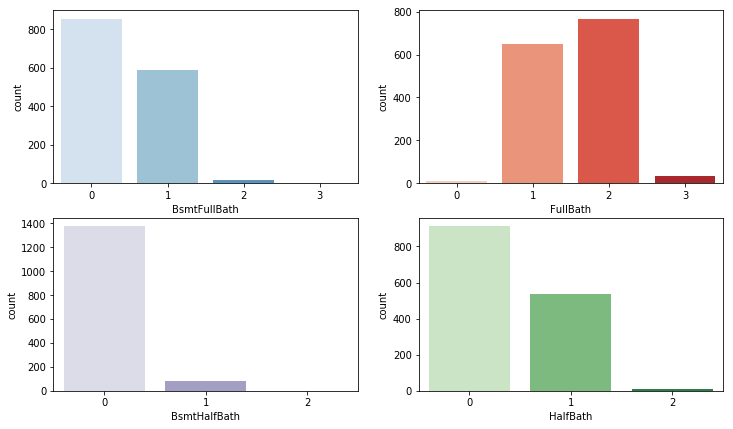

In [460]:
#Create four bar plots to analyze the variables
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, sharey=False, figsize = (12,7))
sns.countplot('BsmtFullBath', ax= ax1[0], data = houses, palette='Blues')
sns.countplot('BsmtHalfBath', ax = ax2[0], data = houses, palette = 'Purples')
sns.countplot('FullBath', ax= ax1[1], data = houses, palette = 'Reds')
sns.countplot('HalfBath', ax = ax2[1], data = houses, palette='Greens')
fig.tight_layout()

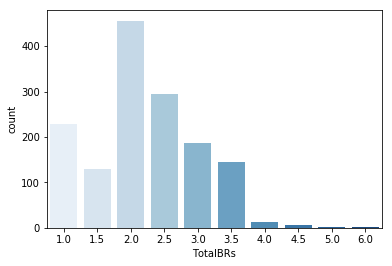

In [394]:
# Create one variable that contains the information about the number of bathrooms:
#Full bathroom counts as 1 , Half bathroom counts as 0.5 

houses['TotalBRs'] = houses['BsmtFullBath'] + houses['FullBath'] + 0.5*(houses['BsmtHalfBath'] + houses['HalfBath'])
sns.countplot('TotalBRs', data = houses, palette = 'Blues')

Compare this bar chart with the 4 plots we created before. Which one is easy to interpret? If it's easier for you, it's easier for your model, too.

### How old is the house?
Again, think about simplicity and usefulness of the data. What is easier to understand and interpret, and has more predictive power?:
- "This house was built in 1973 and sold in 2008"
- "This house is 35 years old"

We will create a new variable to determine how old the house was at the moment of selling.

D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


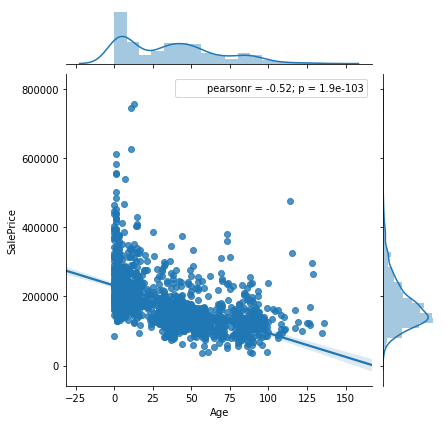

In [44]:
# Create the 'Age' variable
houses['Age'] = houses['YrSold'] - houses['YearBuilt']
sns.jointplot(x='Age',y='SalePrice',data=houses,kind='reg')

As a result, we have created a new variable which probably has good predictive power! We could improve this even more by creating a binomial feature to identify a house as 'Brand New' (notice the high number of points close to zero)

## Exercises

**Data exploration** 
* Create plots to explore the relationships between the following variables:
    - MSSubclass and SalePrice
    - GarageCars and Garage Area

* Do you think that the feature 'Utilities' is important to predict house prices?  What about HouseStyle? Use data descriptions/plots to answer. 

**Imputation of Null Values**
* Complete the imputation of values for the Fireplace Quality feature, taking into account the 'Fireplaces' data.
* Complete the imputation of values for the Basement features that contain NAs.


**Correlation**

What would you do with the features that show strong correlations amongst themselves? Create the code. 

**Feature Engineering**
* Create a feature that indicates whether a house is new. Do you think that people pay a premium for buying a brand new house? Use plots to determine if this feature could be a useful predictor.
* Convert the Year and Month features to categorical. 